In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_csv("Final_Cleaned_Main_Dataset.csv")

In [36]:
print(df.head(70))
print(df.info())
print(df["Quarter"].unique())  # Check unique values in "Quarter"


                     Province  Quarter  Excellent_Very_Good  Good  Fair_Poor
0   Newfoundland and Labrador  Q2 2021                 46.6  37.2       16.2
1        Prince Edward Island  Q2 2021                 48.7  33.1       18.1
2                 Nova Scotia  Q2 2021                 47.0  29.3       23.7
3               New Brunswick  Q2 2021                 46.9  37.8       15.2
4                      Quebec  Q2 2021                 53.0  34.3       12.7
..                        ...      ...                  ...   ...        ...
65                    Ontario  Q4 2022                 44.6  32.4       23.0
66                   Manitoba  Q4 2022                 46.2  33.1       20.6
67               Saskatchewan  Q4 2022                 41.8  35.2       23.0
68                    Alberta  Q4 2022                 44.7  35.6       19.7
69           British Columbia  Q4 2022                 44.6  31.4       24.0

[70 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 

In [39]:
# Extract "Qx" and "YYYY" separately
df[["Quarter_Extracted", "Year_Extracted"]] = df["Quarter"].str.extract(r"(Q\d)\s(\d{4})")

# Combine into "YYYYQx" format
df["Quarter"] = df["Year_Extracted"] + df["Quarter_Extracted"]

# Convert to pandas PeriodIndex
df["Quarter"] = pd.PeriodIndex(df["Quarter"], freq="Q")

# Sort values chronologically
df = df.sort_values(["Province", "Quarter"])

# Convert back to string for visualization
df["Quarter"] = df["Quarter"].astype(str)

print(df["Quarter"].unique())  # Verify correct format


['2021Q2' '2021Q3' '2021Q4' '2022Q1' '2022Q2' '2022Q3' '2022Q4' '2023Q2'
 '2023Q3']


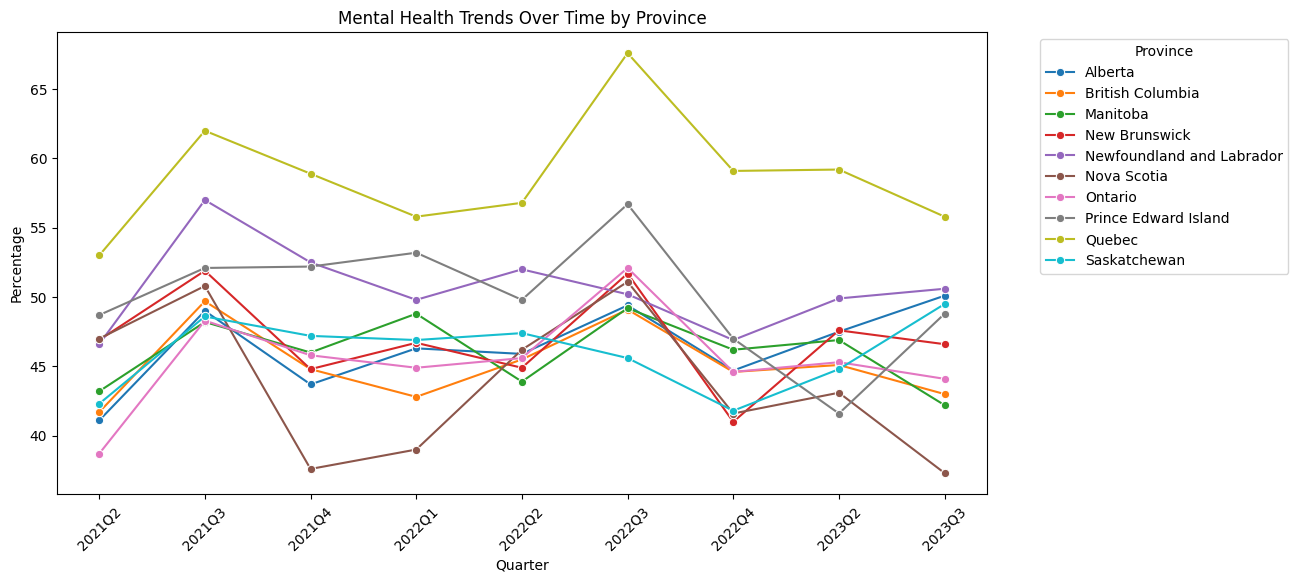

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Quarter", y="Excellent_Very_Good", hue="Province", marker="o")

plt.xticks(rotation=45)
plt.title("Mental Health Trends Over Time by Province")
plt.xlabel("Quarter")
plt.ylabel("Percentage")
plt.legend(title="Province", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()


In [41]:
# Generate a complete list of quarters from the dataset's range
all_quarters = pd.period_range(start=df["Quarter"].min(), end=df["Quarter"].max(), freq="Q").astype(str)

# Create a DataFrame with all possible Province-Quarter combinations
full_df = pd.MultiIndex.from_product([df["Province"].unique(), all_quarters], names=["Province", "Quarter"]).to_frame(index=False)

# Merge with the original dataset to identify missing values
df_missing = full_df.merge(df, on=["Province", "Quarter"], how="left")

# Mark missing data explicitly
df_missing["Missing"] = df_missing["Excellent_Very_Good"].isna()


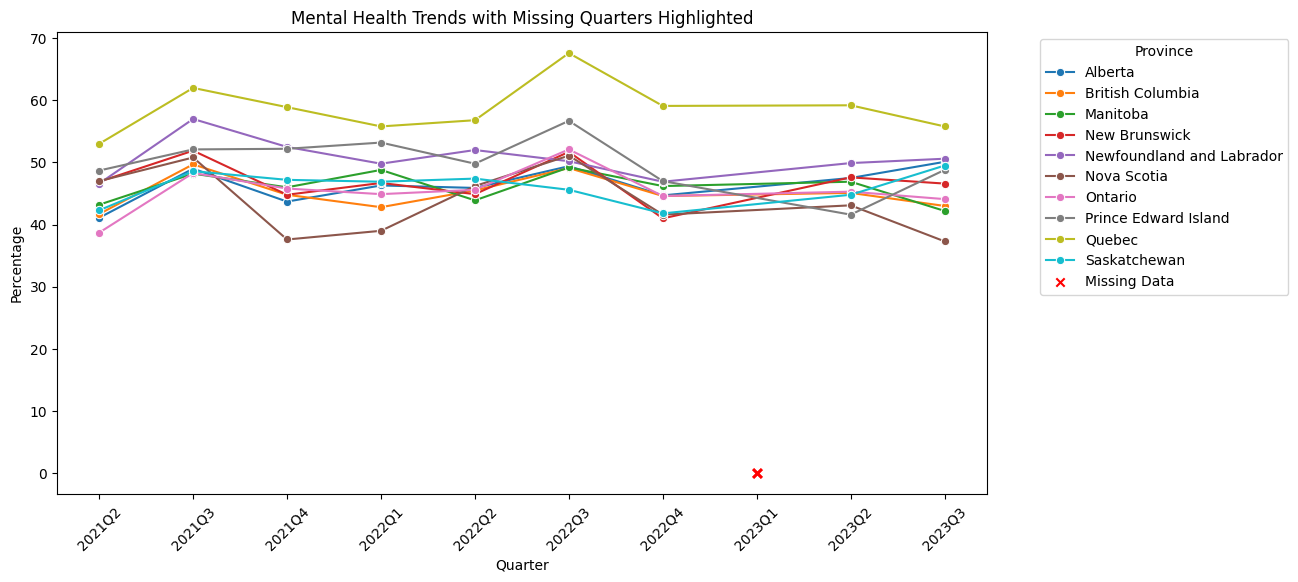

In [43]:
plt.figure(figsize=(12, 6))

# Plot known data
sns.lineplot(data=df_missing, x="Quarter", y="Excellent_Very_Good", hue="Province", marker="o", linestyle="-")

# Highlight missing quarters
missing_data = df_missing[df_missing["Missing"]]
plt.scatter(missing_data["Quarter"], [0]*len(missing_data), color="red", marker="x", label="Missing Data")

plt.xticks(rotation=45)
plt.title("Mental Health Trends with Missing Quarters Highlighted")
plt.xlabel("Quarter")
plt.ylabel("Percentage")
plt.legend(title="Province", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()
